# Analysis of the Bifurcation Point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

init_printing()

x, t, d, Pe, Pm, v, δ, N, v1, v0, ρ, σ, xd, qx, qy, π, re, rs = symbols('x t d P_e P_m v delta N v_1 v_0 rho, sigma \dot{x} q_x q_y pi r_e r_s')

We know that the dynamical equation is given as

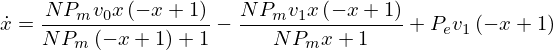

In [2]:
f = Pe*v1*(1-x) + Pm*v0*N*(1-x)*x/(1+Pm*N*(1-x)) - Pm*v1*N*x*(1-x)/(1+Pm*N*x)
Eq(xd,f)

Substituting $v_0$ and $v_1$ with $v$ and $v+\delta$, we get

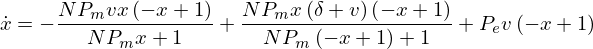

In [4]:
F = f.subs([(v0, v+δ), (v1,v)])
Eq(xd,F)

The fixed points of this system are obatined by solving

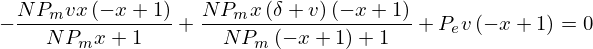

In [5]:
Eq(F)

It is easy to see that $\left( x - 1 \right)$ is common in the left hand side. **Hence $x=1$ is the trivial fixed point of the system.** Dividing the equation by $\left( x - 1 \right)$, we get

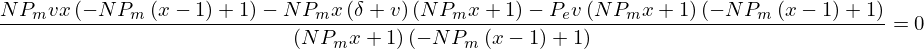

In [6]:
F1 = simplify(F/(x-1))
Eq(F1)

The equation would be much easier to analyze if we multiply by the denominator. This can be done as long as the denominator is not zero. We find the roots of the denominator to be

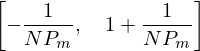

In [7]:
solve(denom(F1),x)

Both of these roots are outside the physically relevant range of $0 \le x \le 1$. Therefore, we can multiply by the denominator without any problem. This gives us

In [8]:
F2 = F1*denom(F1)
Eq(F2)

The left hand side is a quadratic polynomial is $x$. Therefore the system has two additional roots. To find out when the roots are real, we collect the coefficients of the quadratic polynomial

In [9]:
cf = Poly(F2,x).coeffs()
cf

The bifurcation occurs when the determinant is zero (because the number of real roots of the system changes from 1 to 3 as determinant goes from being negative to being positive). Hence the equation determining the bifurcation point is

In [11]:
det = cf[1]**2-4*cf[0]*cf[2]
det

The bifurcation points (say in terms of $N$) are, therefore,

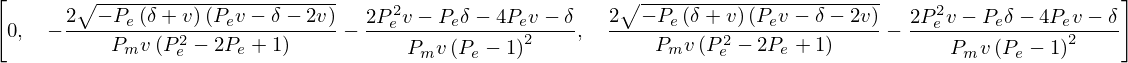

In [12]:
bp = solve(det,N)
bp

Let us substitute some typical values to find out which roots are valid

In [13]:
[
    bp[0].subs([(Pe,0.12), (Pm,0.025), (v,0.7), (δ,0.1)]),
    bp[1].subs([(Pe,0.12), (Pm,0.025), (v,0.7), (δ,0.1)]),
    bp[2].subs([(Pe,0.12), (Pm,0.025), (v,0.7), (δ,0.1)]),
]

We can see that the first and the second roots are invalid. Hence, the actual bifurcation point is the last one. Finally, we plot it as a function of $P_e$ and $\delta$

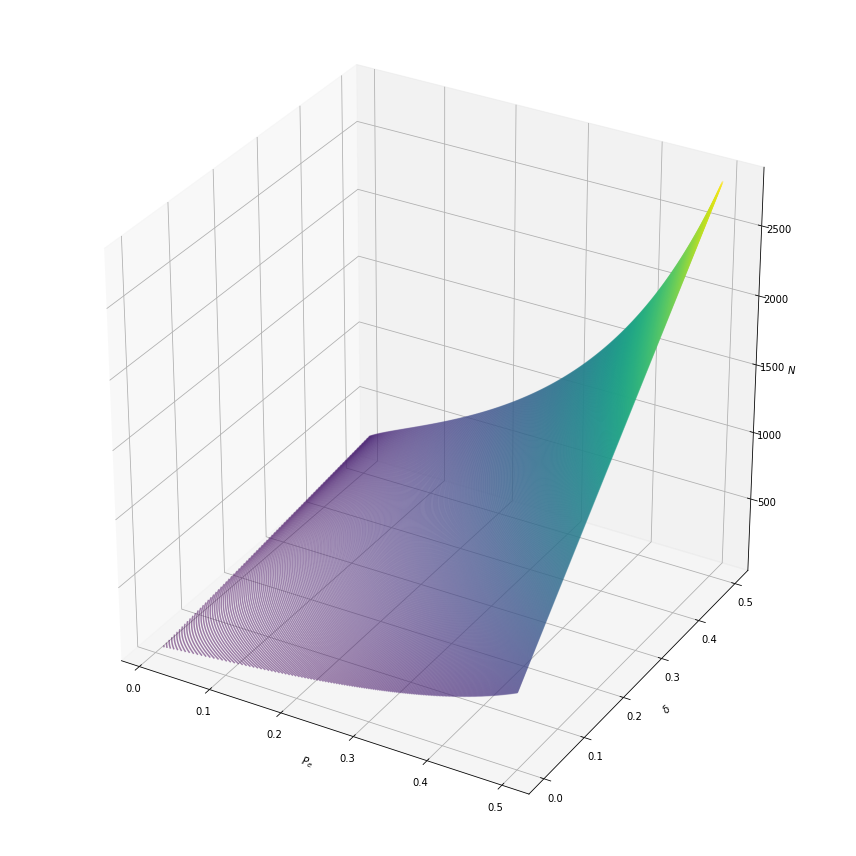

In [14]:
fun = bp[2]

pp = fun.subs([(Pm,0.025),(v,0.1)])

pf = lambdify([Pe, δ], pp)

X = np.linspace(0.01,0.5,200)
Y = np.linspace(0,0.5,200)

XX, YY = np.meshgrid(X,Y)
ZZ = pf(XX,YY)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.contour3D(XX, YY, ZZ, 1000, alpha=0.5)
ax.set_xlabel('$P_e$')
ax.set_ylabel('$\delta$')
ax.set_zlabel('$N$')
plt.tight_layout()
plt.show()

## Various Representations of Bifurcation

### In terms of $N$ and $v$

In [15]:
N_δ = fun.subs([(Pm,0.0314), (Pe,0.1256), (v,0.6)])

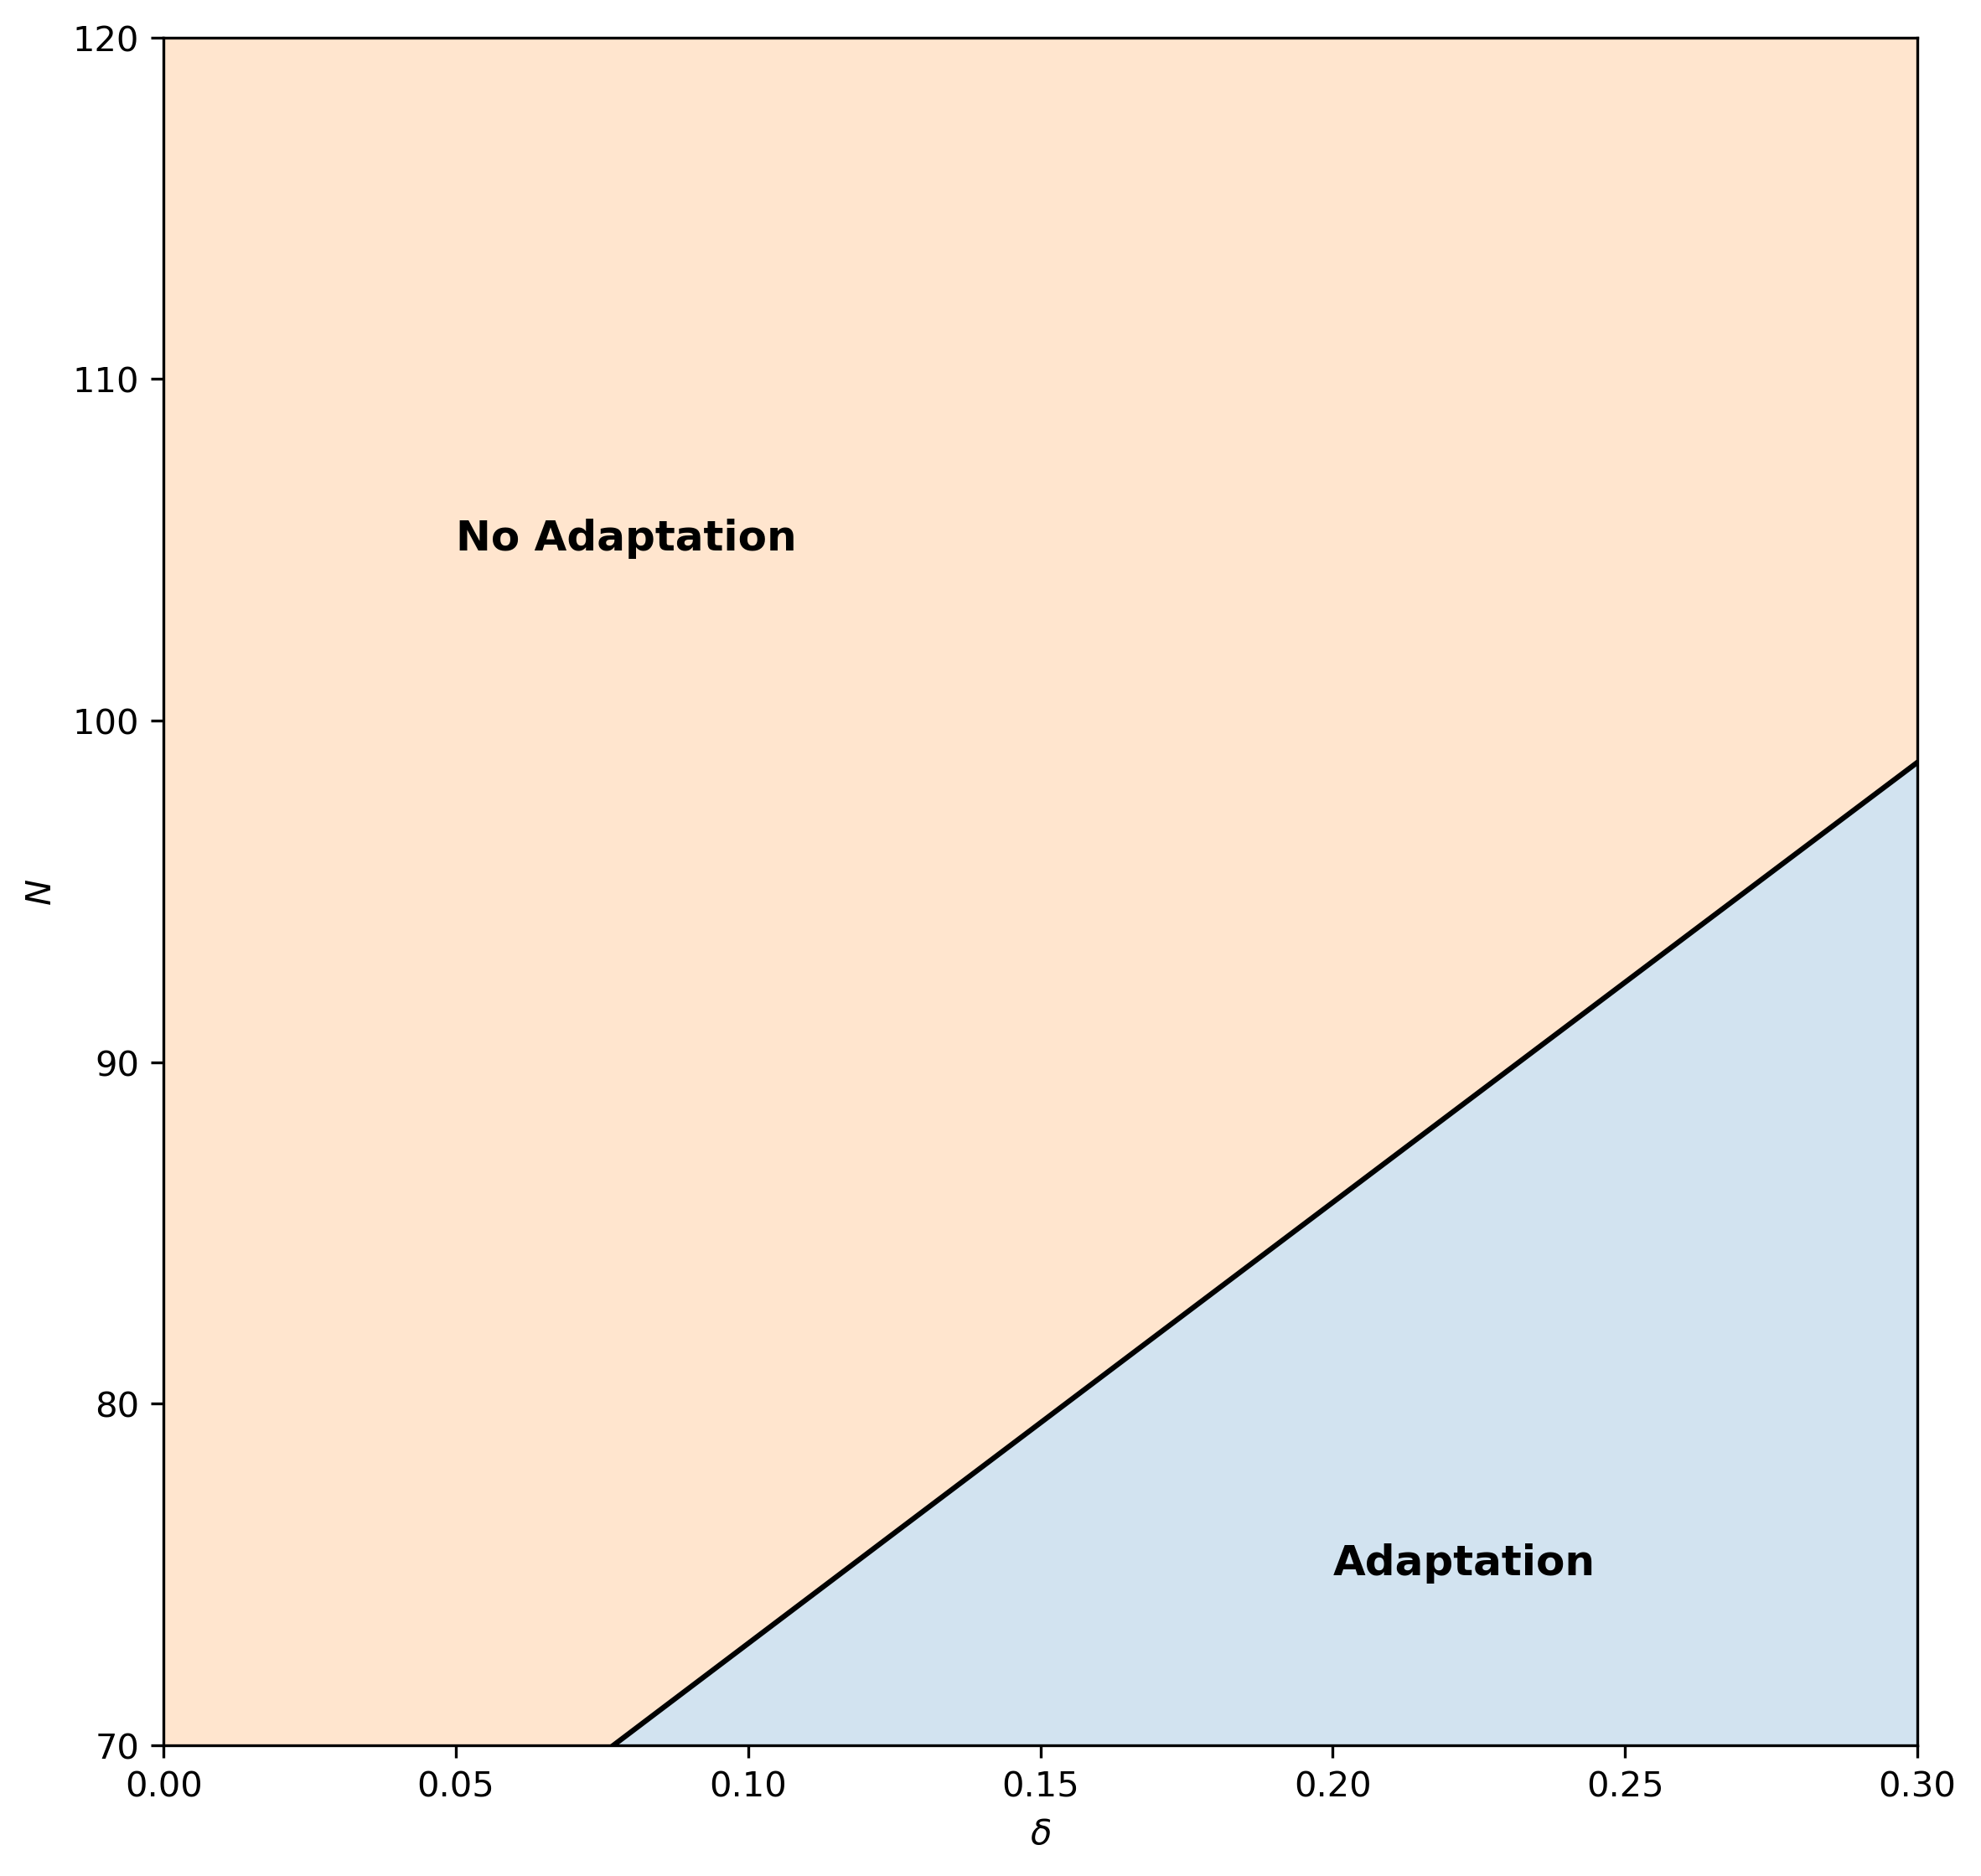

In [16]:
plt.figure(figsize=(9,9), dpi=300)

Ngrid = 1001

δ_list = np.linspace(0,0.3,Ngrid)
N_list = np.empty(Ngrid)

for i in range(len(δ_list)):
    N_list[i] = N_δ.subs(δ,δ_list[i])

plt.fill_between(δ_list, N_list, 70, alpha=0.2)
plt.fill_between(δ_list, N_list, 120, alpha=0.2)
plt.plot(δ_list, N_list, 'k')

plt.xlim((0,0.3))
plt.ylim((70,120))

plt.text(0.2, 75, 'Adaptation', fontsize=12, weight='bold')
plt.text(0.05, 105, 'No Adaptation', fontsize=12, weight='bold')

plt.xlabel('$\delta$')
plt.ylabel('$N$')

plt.savefig('Plot_N_delta.pdf')

plt.show()

### In Terms of $N$ and $r_s$

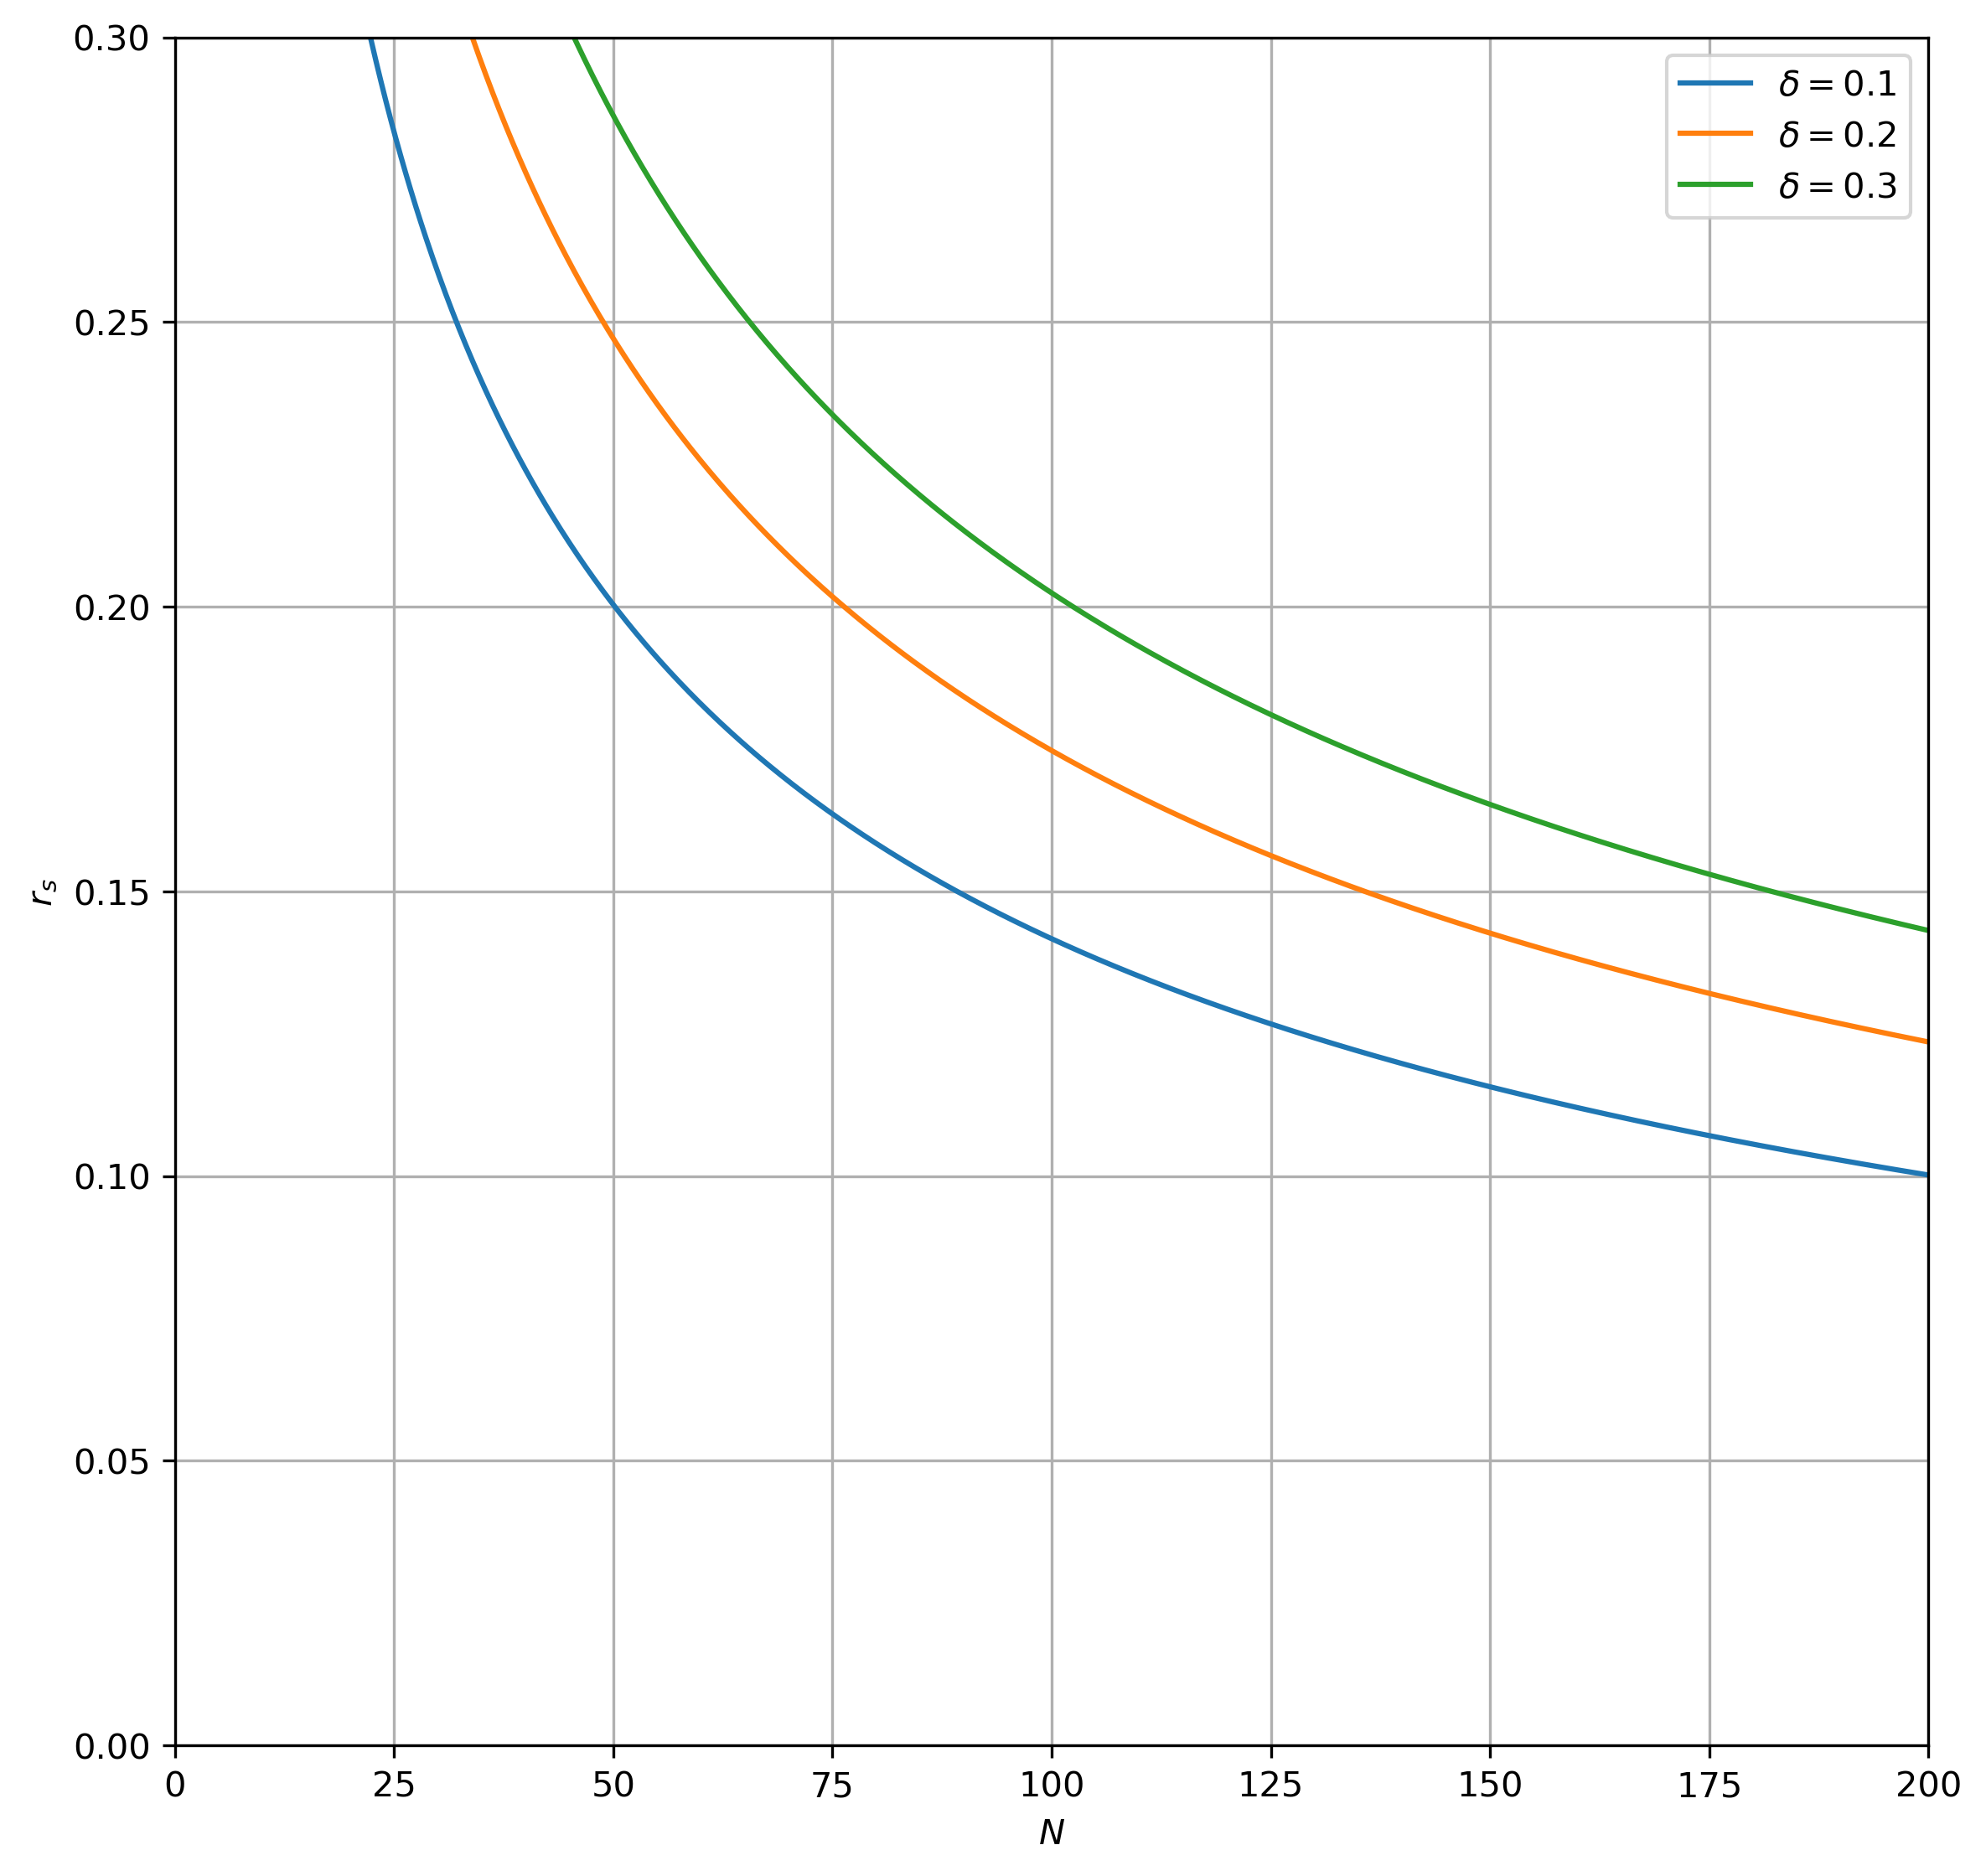

In [17]:
plt.figure(figsize=(9,9), dpi=300)
bp = solve(det,Pm)[2]

for δ0 in [0.1, 0.2, 0.3]:

    Pm_N = bp.subs([(Pm,0.0314), (v,0.1), (Pe,0.2), (δ,δ0)])

    Ngrid = 1001

    N_list = np.linspace(10,200,Ngrid)
    Pm_list = np.empty(Ngrid)

    for i in range(len(δ_list)):
        Pm_list[i] = sqrt(Pm_N.subs(N,N_list[i])/np.pi)

    plt.plot(N_list, Pm_list, label='$\delta = $'+str(δ0))

plt.xlim((0,200))
plt.ylim((0.0,0.3))

plt.grid()
plt.legend()

plt.xlabel('$N$')
plt.ylabel('$r_s$')

plt.savefig('Plot_Pm_N.pdf')

plt.show()

### In Terms of $v$ and $\delta$

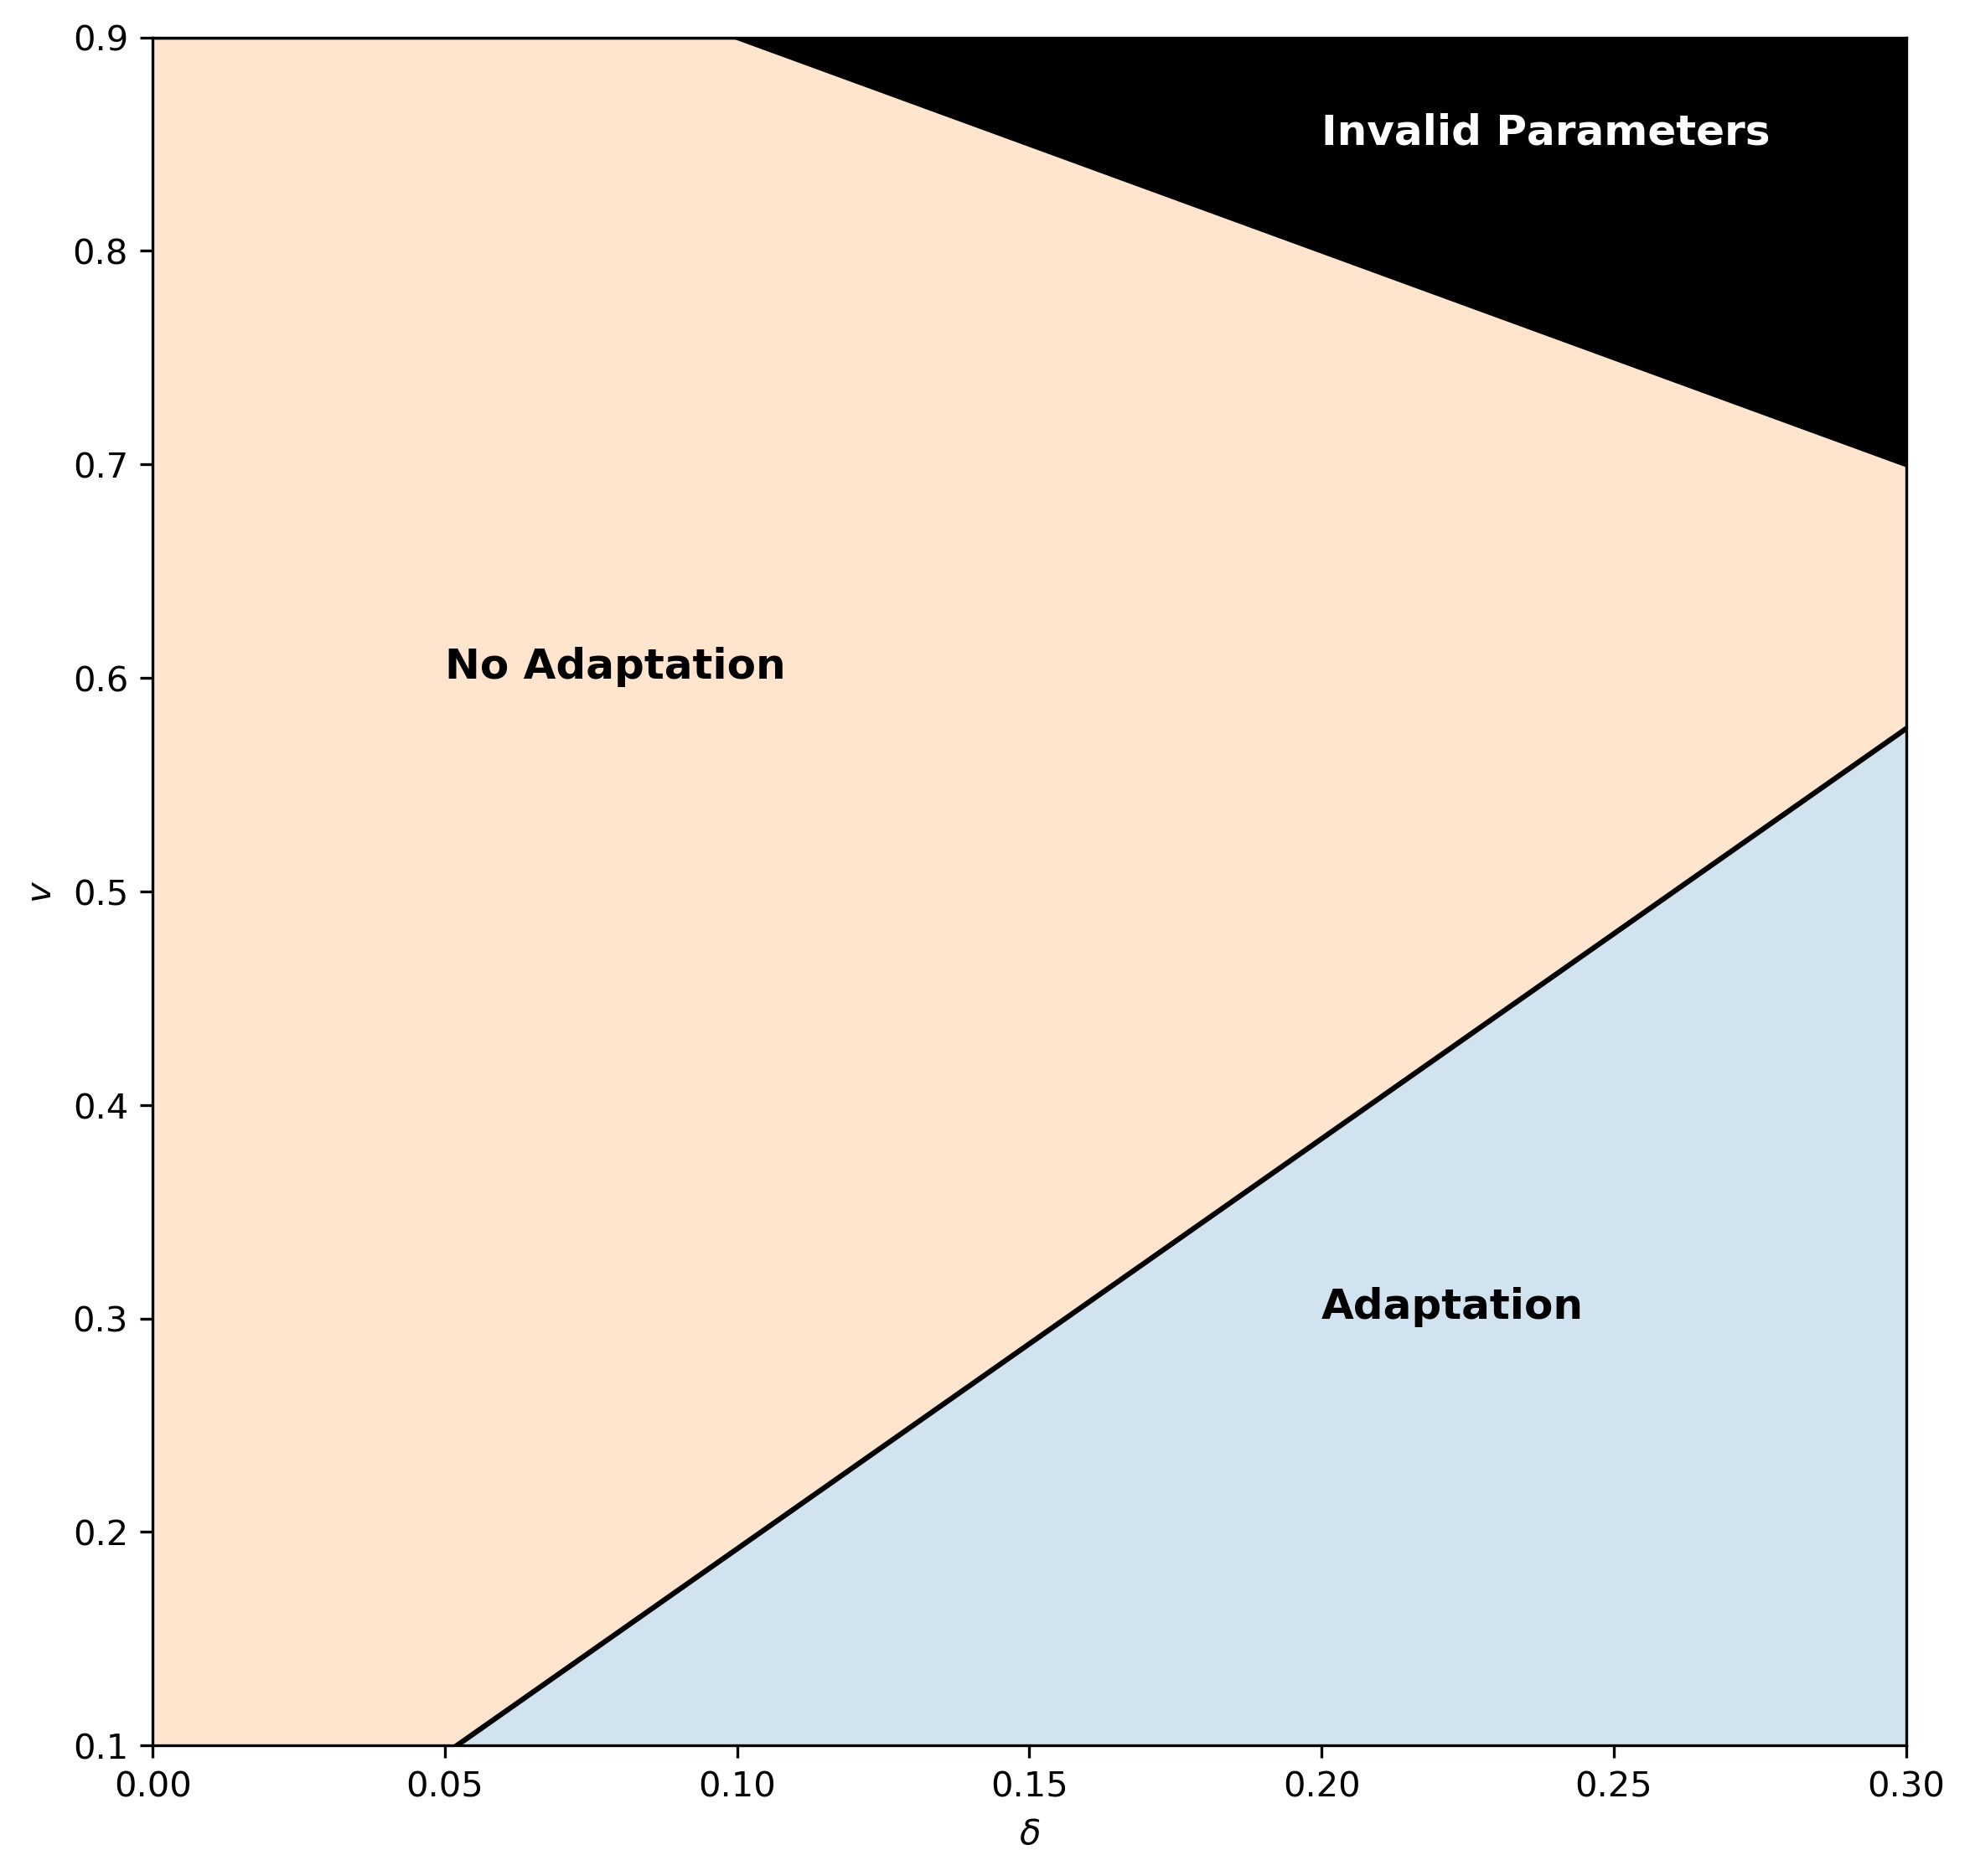

In [18]:
bp = solve(det,v)[0]
v_δ0 = bp.subs([(Pe,0.125), (Pm,0.0314), (N,100)])
bp = solve(det,v)[1]
v_δ1 = bp.subs([(Pe,0.125), (Pm,0.0314), (N,100)])

plt.figure(figsize=(9,9), dpi=300)

Ngrid = 1001

δ_list = np.linspace(0,0.3,Ngrid)
v_list0 = np.empty(Ngrid)
v_list1 = np.empty(Ngrid)

for i in range(len(δ_list)):
    v_list0[i] = v_δ0.subs(δ,δ_list[i])
    v_list1[i] = v_δ1.subs(δ,δ_list[i])

plt.fill_between(δ_list, v_list1, 0.1, alpha=0.2)
plt.fill_between(δ_list, v_list1, 0.9, alpha=0.2)
plt.fill_between(δ_list, 1-δ_list, 0.9, color='k')

# plt.plot(δ_list, v_list0, 'r')
plt.plot(δ_list, v_list1, 'k')
plt.plot(δ_list, 1-δ_list, 'k')

plt.xlim((0,0.3))
plt.ylim((0.1,0.9))

plt.text(0.2, 0.3, 'Adaptation', fontsize=12, weight='bold')
plt.text(0.05, 0.6, 'No Adaptation', fontsize=12, weight='bold')
plt.text(0.2, 0.85, 'Invalid Parameters', fontsize=12, weight='bold', color='white')

plt.xlabel('$\delta$')
plt.ylabel('$v$')

plt.savefig('Plot_v_delta.pdf')

plt.show()

## 1D Bifurcation Plots

In [20]:
ss = solve(simplify(F/(1-x)),x)

bp = solve(det,N)

### Prameter: Swarm Size

In [22]:
fp = np.empty((1001,3))
count = 0

PPm = np.pi*0.15*0.15

for NN in np.linspace(1,200,1001):
#     plt.plot(NN, 1, '.b')
    if ss[0].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,NN)]).is_real:
        
        fp[count,0] = NN
        fp[count,1] = ss[0].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,NN)])
        fp[count,2] = ss[1].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,NN)])
        
        count += 1

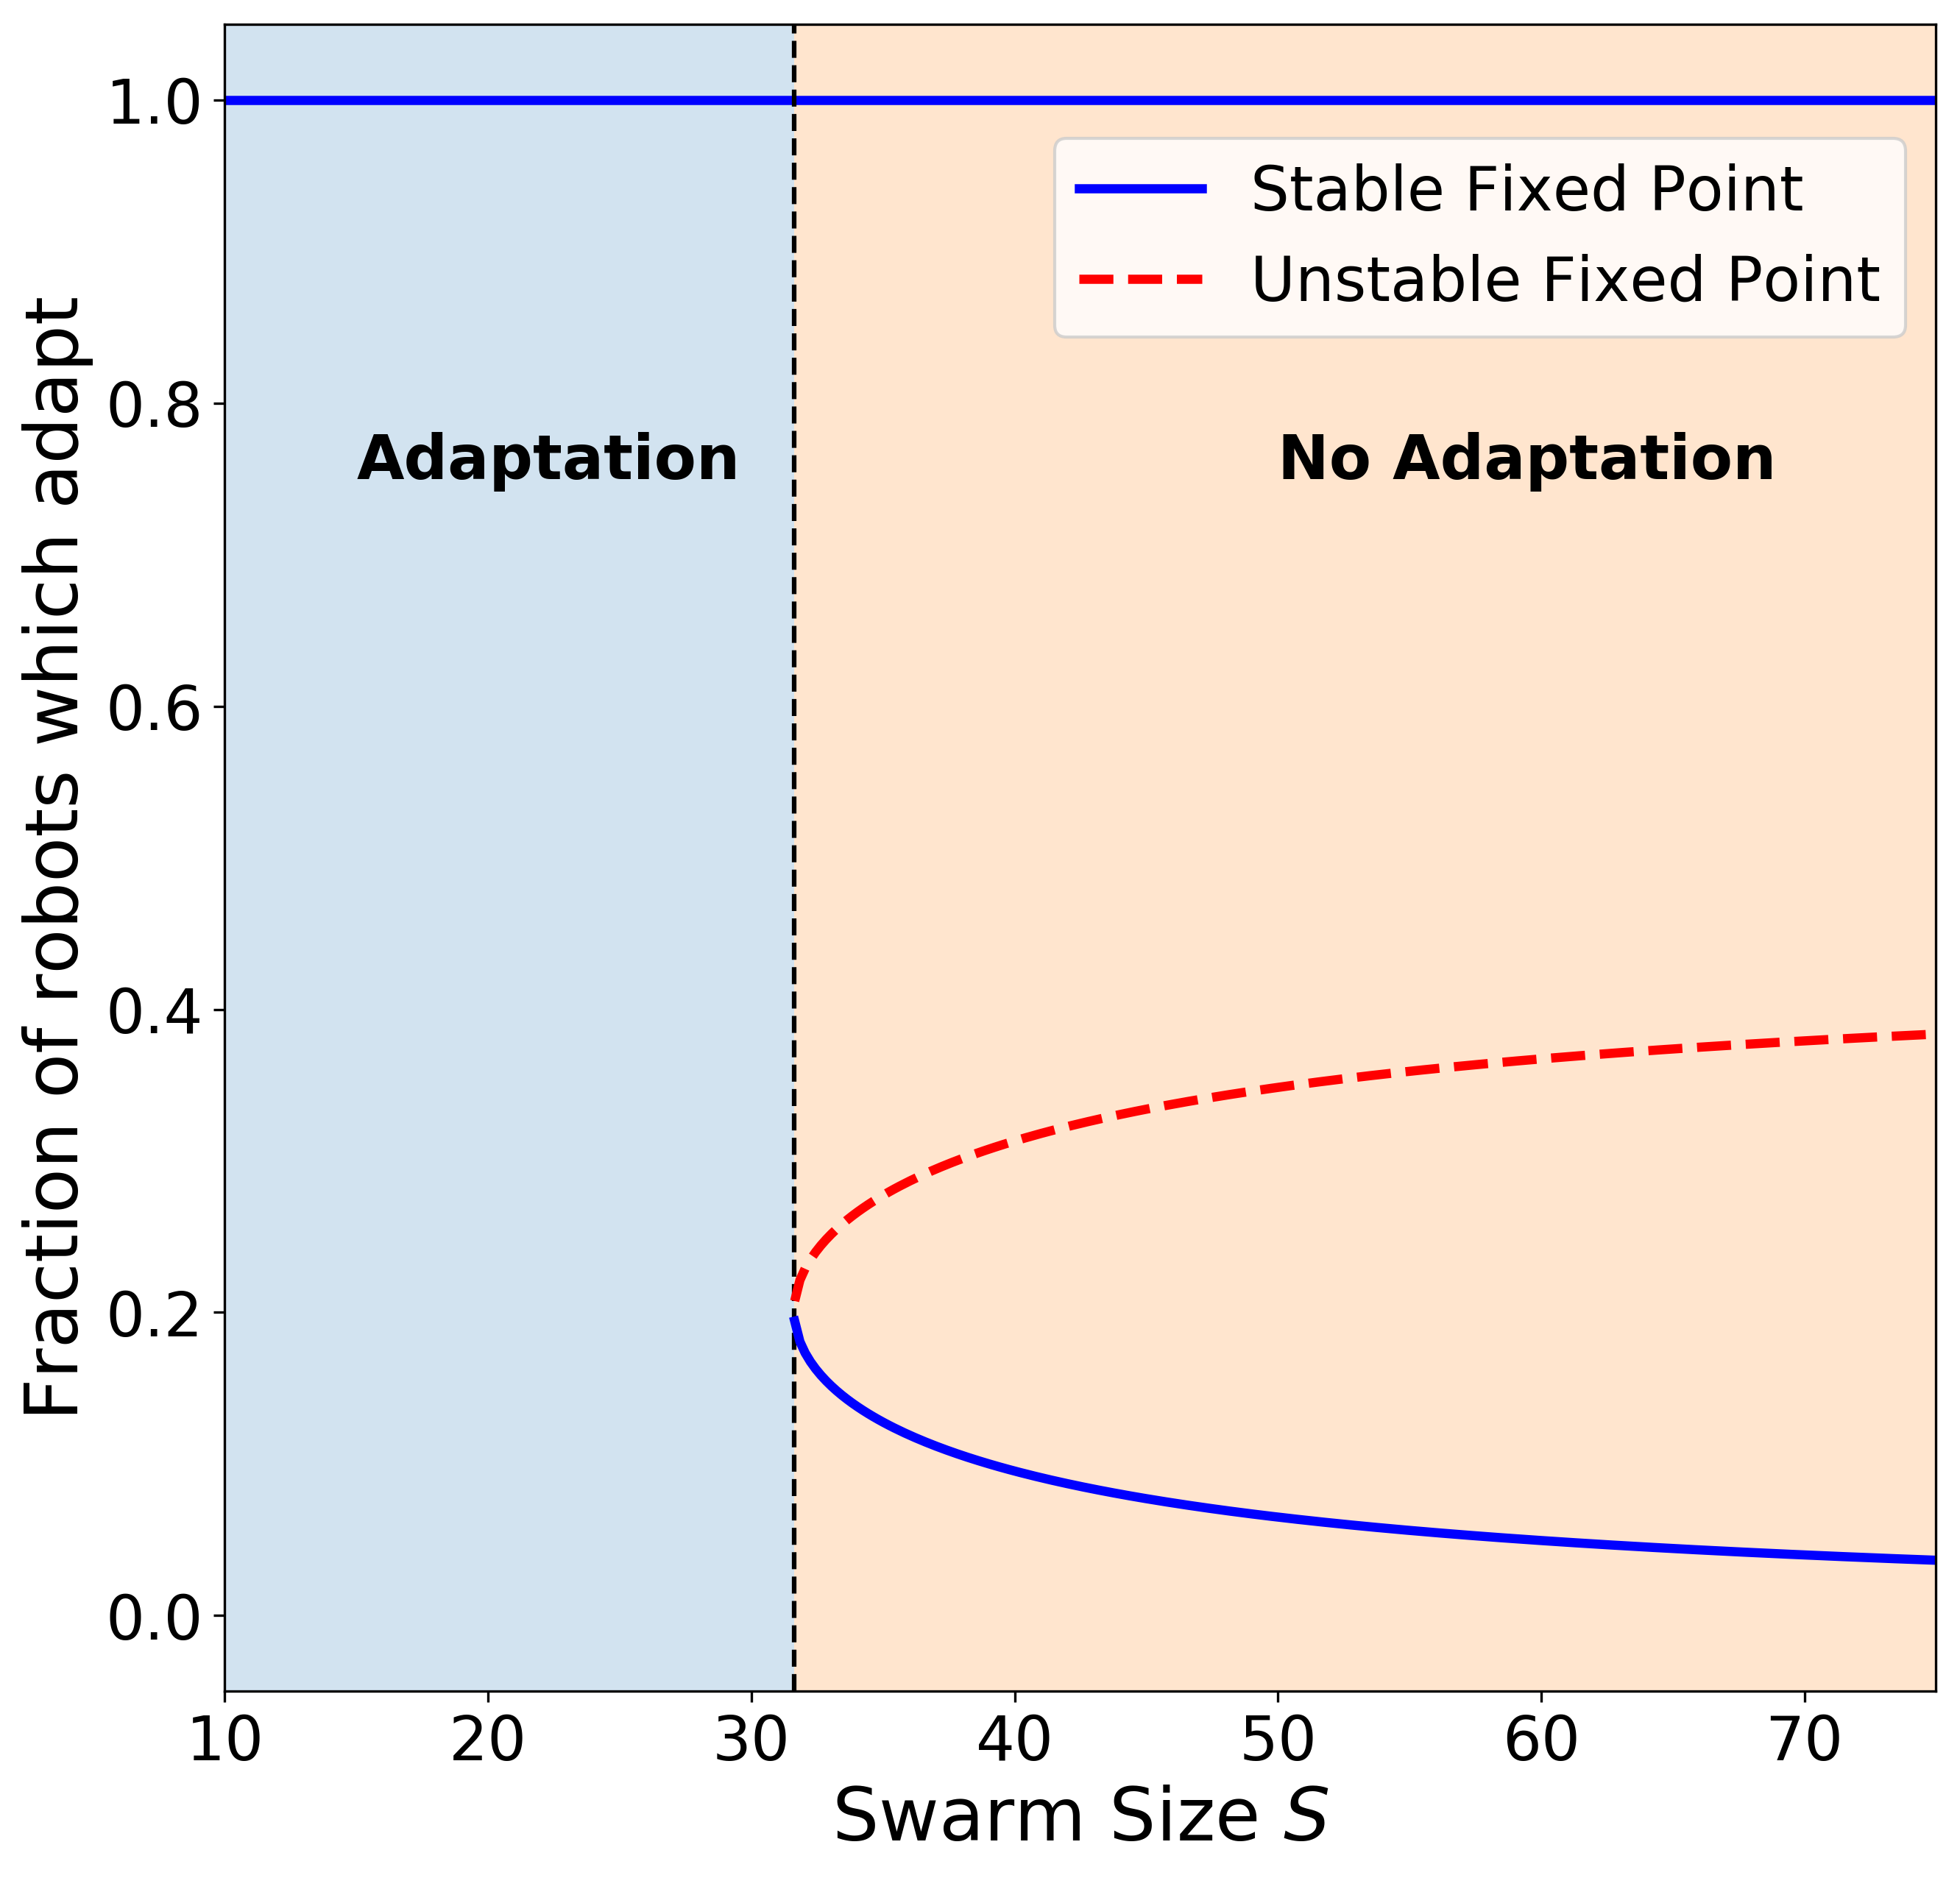

In [24]:
plt.figure(figsize=(10,10), dpi=300)

plt.hlines(1, 0, 200, color='b', lw=3)

plt.plot(fp[:count,0], fp[:count,1], 'b', label='Stable Fixed Point', lw=3)
plt.plot(fp[:count,0], fp[:count,2], '--r', label='Unstable Fixed Point', lw=3)

bbpp = bp[2].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,200)])

plt.vlines(bbpp, -0.05, 1.05, linestyles='dashed')

xp = np.linspace(0,float(bbpp),101)
yp = np.ones(101)+0.05
zp = np.zeros(101)-0.05

plt.fill_between(xp, yp, zp, alpha=0.2)

xp = np.linspace(float(bbpp),200,101)
yp = np.ones(101)+0.05
zp = np.zeros(101)-0.05

plt.fill_between(xp, yp, zp, alpha=0.2)

plt.text(15, 0.75, 'Adaptation', fontsize=20, weight='bold')
plt.text(50, 0.75, 'No Adaptation', fontsize=20, weight='bold')

plt.xlim((10,75))
plt.ylim((-0.05,1.05))

plt.legend(fontsize=20, loc=1, bbox_to_anchor=(1,0.95))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Swarm Size $S$', fontsize=24)
plt.ylabel('Fraction of robots which adapt', fontsize=24)

plt.savefig('Plot_N.pdf')

plt.show()

### Parameter: Communication Range

In [26]:
fp = np.empty((1001,3))
count = 0

r = 0.15
NN = 50

PPm = np.pi*r*r

for r in np.linspace(0,0.5,1001):
    
    PPm = np.pi*r*r
    
    if ss[0].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,NN)]).is_real:
        
        fp[count,0] = r
        fp[count,1] = ss[0].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,NN)])
        fp[count,2] = ss[1].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,NN)])
        
        count += 1

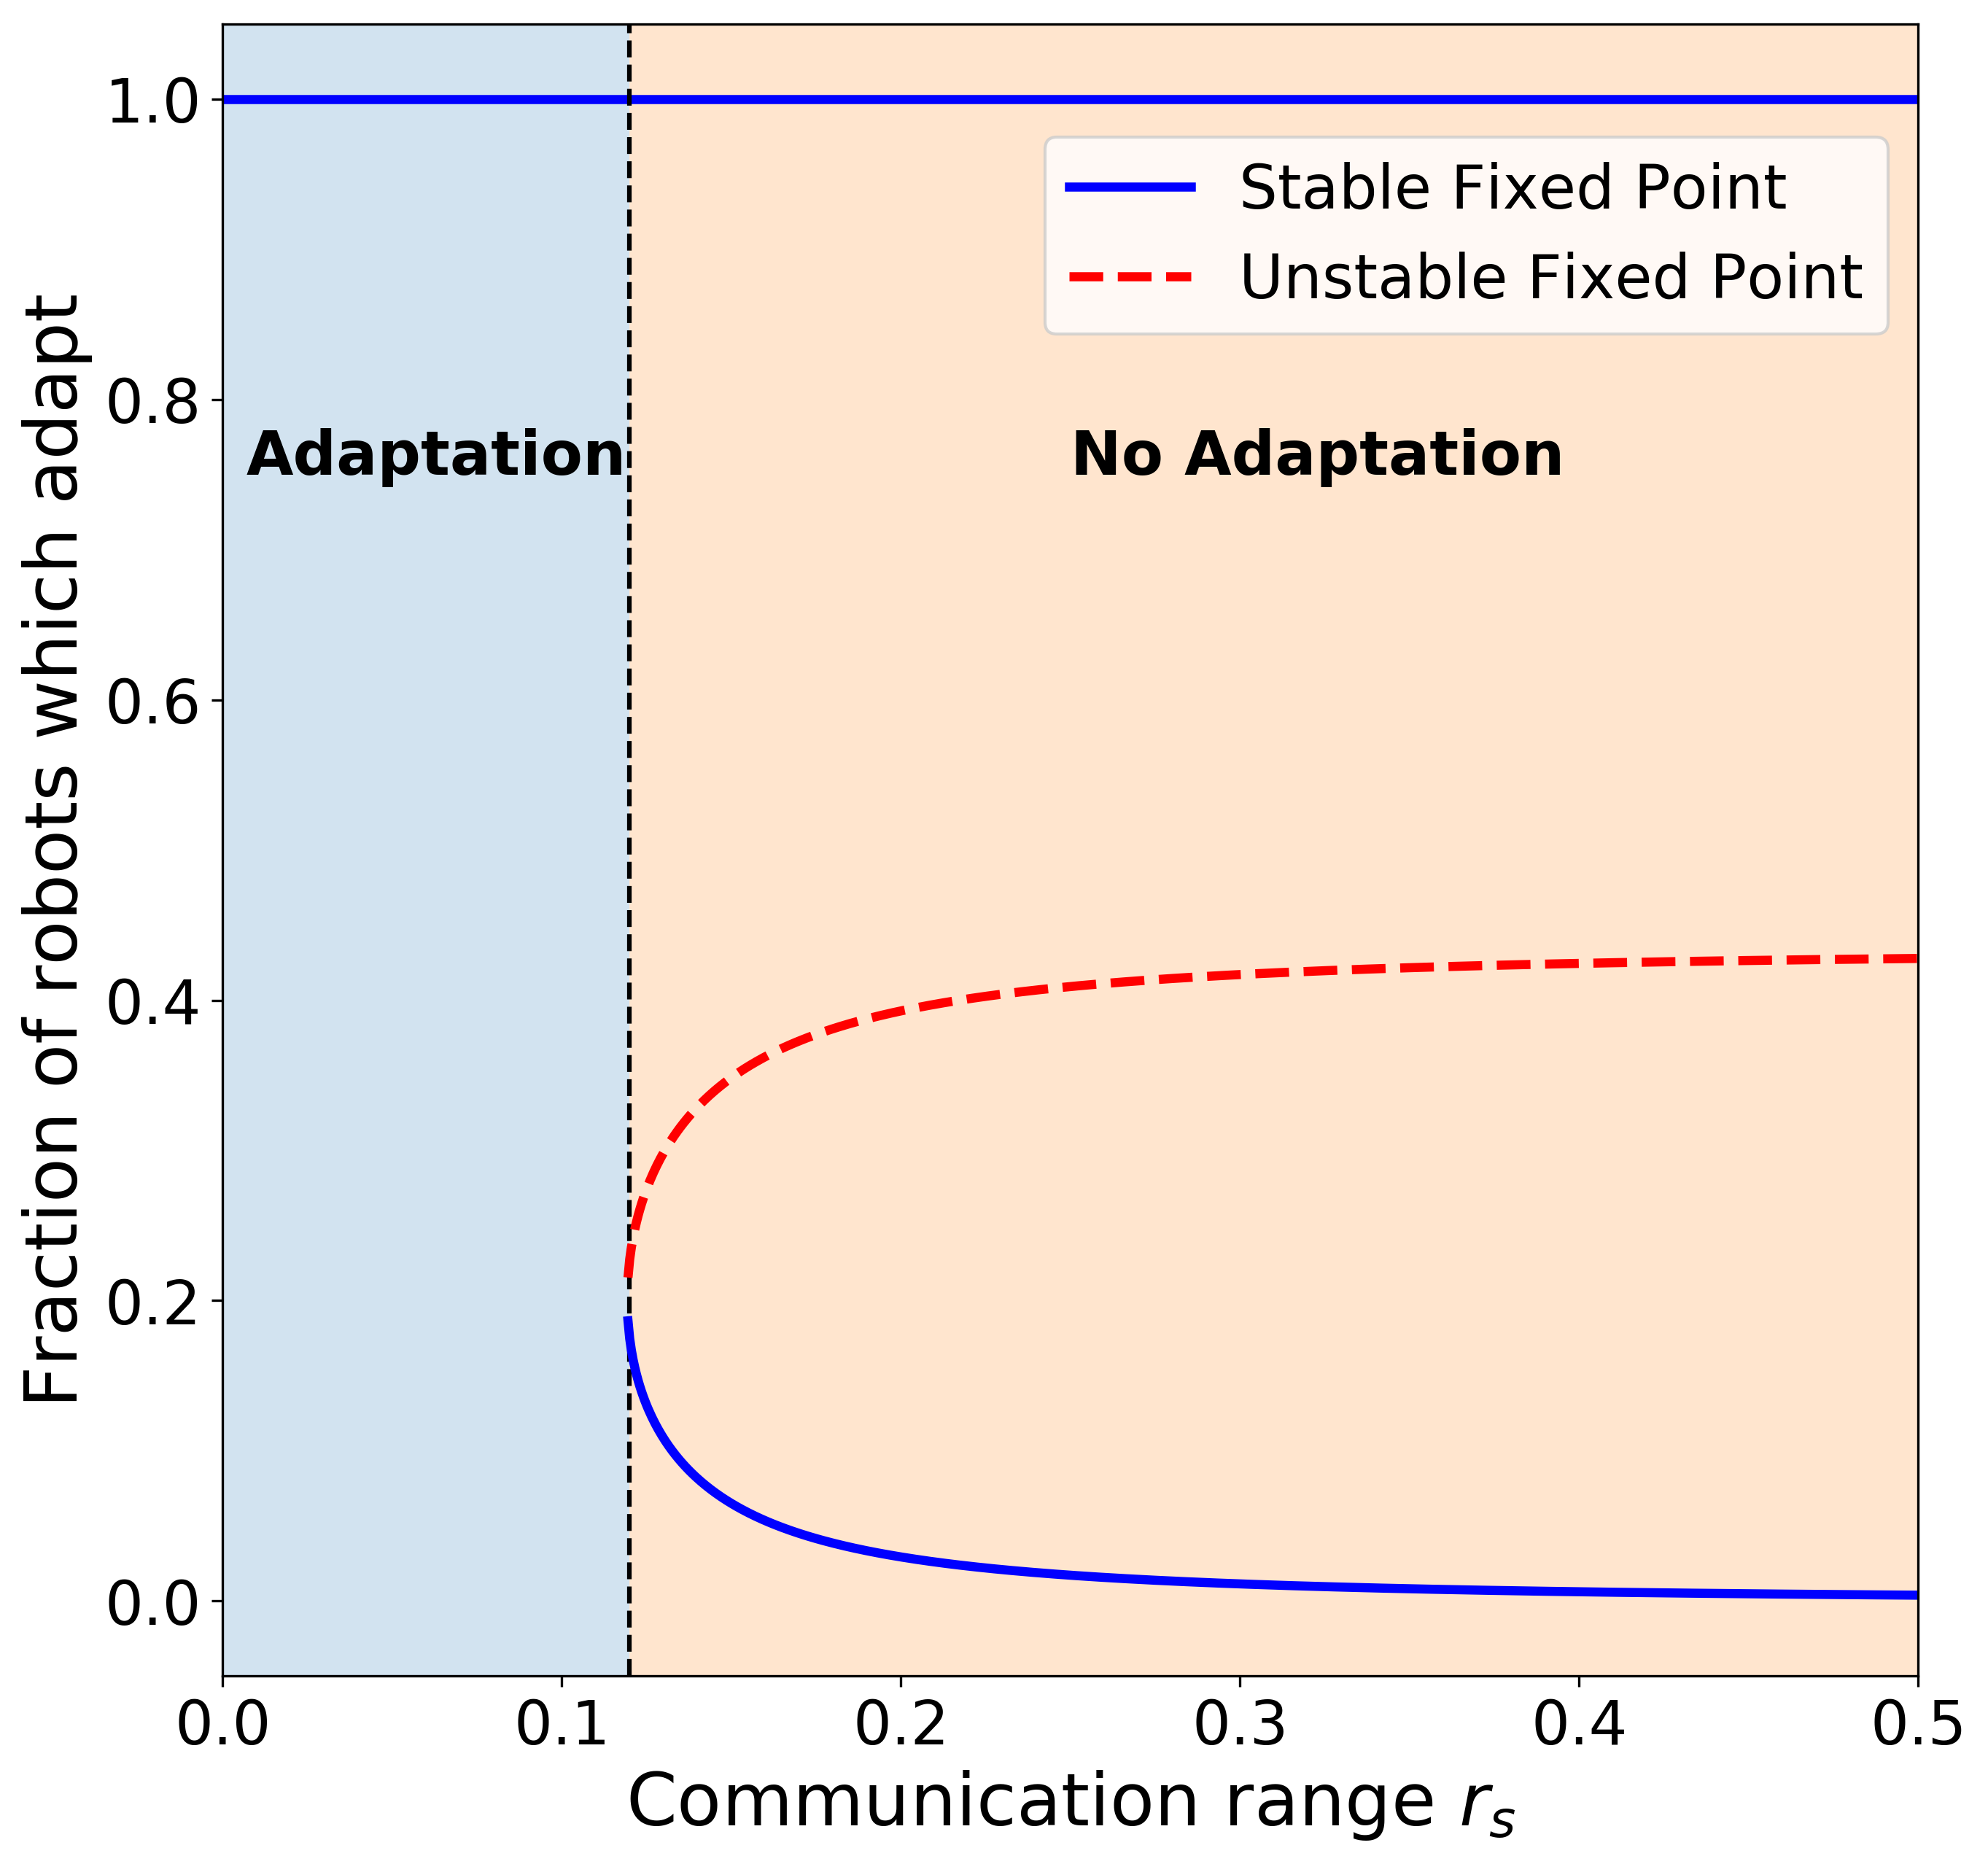

In [28]:
plt.figure(figsize=(10,10), dpi=300)

plt.hlines(1, 0, 0.5, color='b', lw=3)

plt.plot(fp[:count,0], fp[:count,1], 'b', label='Stable Fixed Point', lw=3)
plt.plot(fp[:count,0], fp[:count,2], '--r', label='Unstable Fixed Point', lw=3)

bbpp = bp[2].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,200)])

bbpp = 0.12

plt.vlines(bbpp, -0.05, 1.05, linestyles='dashed')

xp = np.linspace(0,float(bbpp),101)
yp = np.ones(101)+0.05
zp = np.zeros(101)-0.05

plt.fill_between(xp, yp, zp, alpha=0.2)

xp = np.linspace(float(bbpp),200,101)
yp = np.ones(101)+0.05
zp = np.zeros(101)-0.05

plt.fill_between(xp, yp, zp, alpha=0.2)

plt.text(0.007, 0.75, 'Adaptation', fontsize=20, weight='bold')
plt.text(0.25, 0.75, 'No Adaptation', fontsize=20, weight='bold')

plt.xlim((0,0.5))
plt.ylim((-0.05,1.05))

plt.legend(fontsize=20, loc=1, bbox_to_anchor=(1,0.95))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Communication range $r_s$', fontsize=24)
plt.ylabel('Fraction of robots which adapt', fontsize=24)

plt.savefig('Plot_r.pdf')

plt.show()

### Parameter: Target Site Size

In [29]:
fp = np.empty((1001,3))
count = 0

r = 0.15
NN = 50

PPe = np.pi*r*r

for r in np.linspace(0,0.5,1001):
    
    PPe = np.pi*r*r
    
#     plt.plot(NN, 1, '.b')
    if ss[0].subs([(Pe,PPe), (Pm,0.1257), (v,0.7), (δ,0.1), (N,NN)]).is_real:
        
        fp[count,0] = r
        fp[count,1] = ss[0].subs([(Pe,PPe), (Pm,0.1257), (v,0.7), (δ,0.1), (N,NN)])
        fp[count,2] = ss[1].subs([(Pe,PPe), (Pm,0.1257), (v,0.7), (δ,0.1), (N,NN)])
        
        count += 1

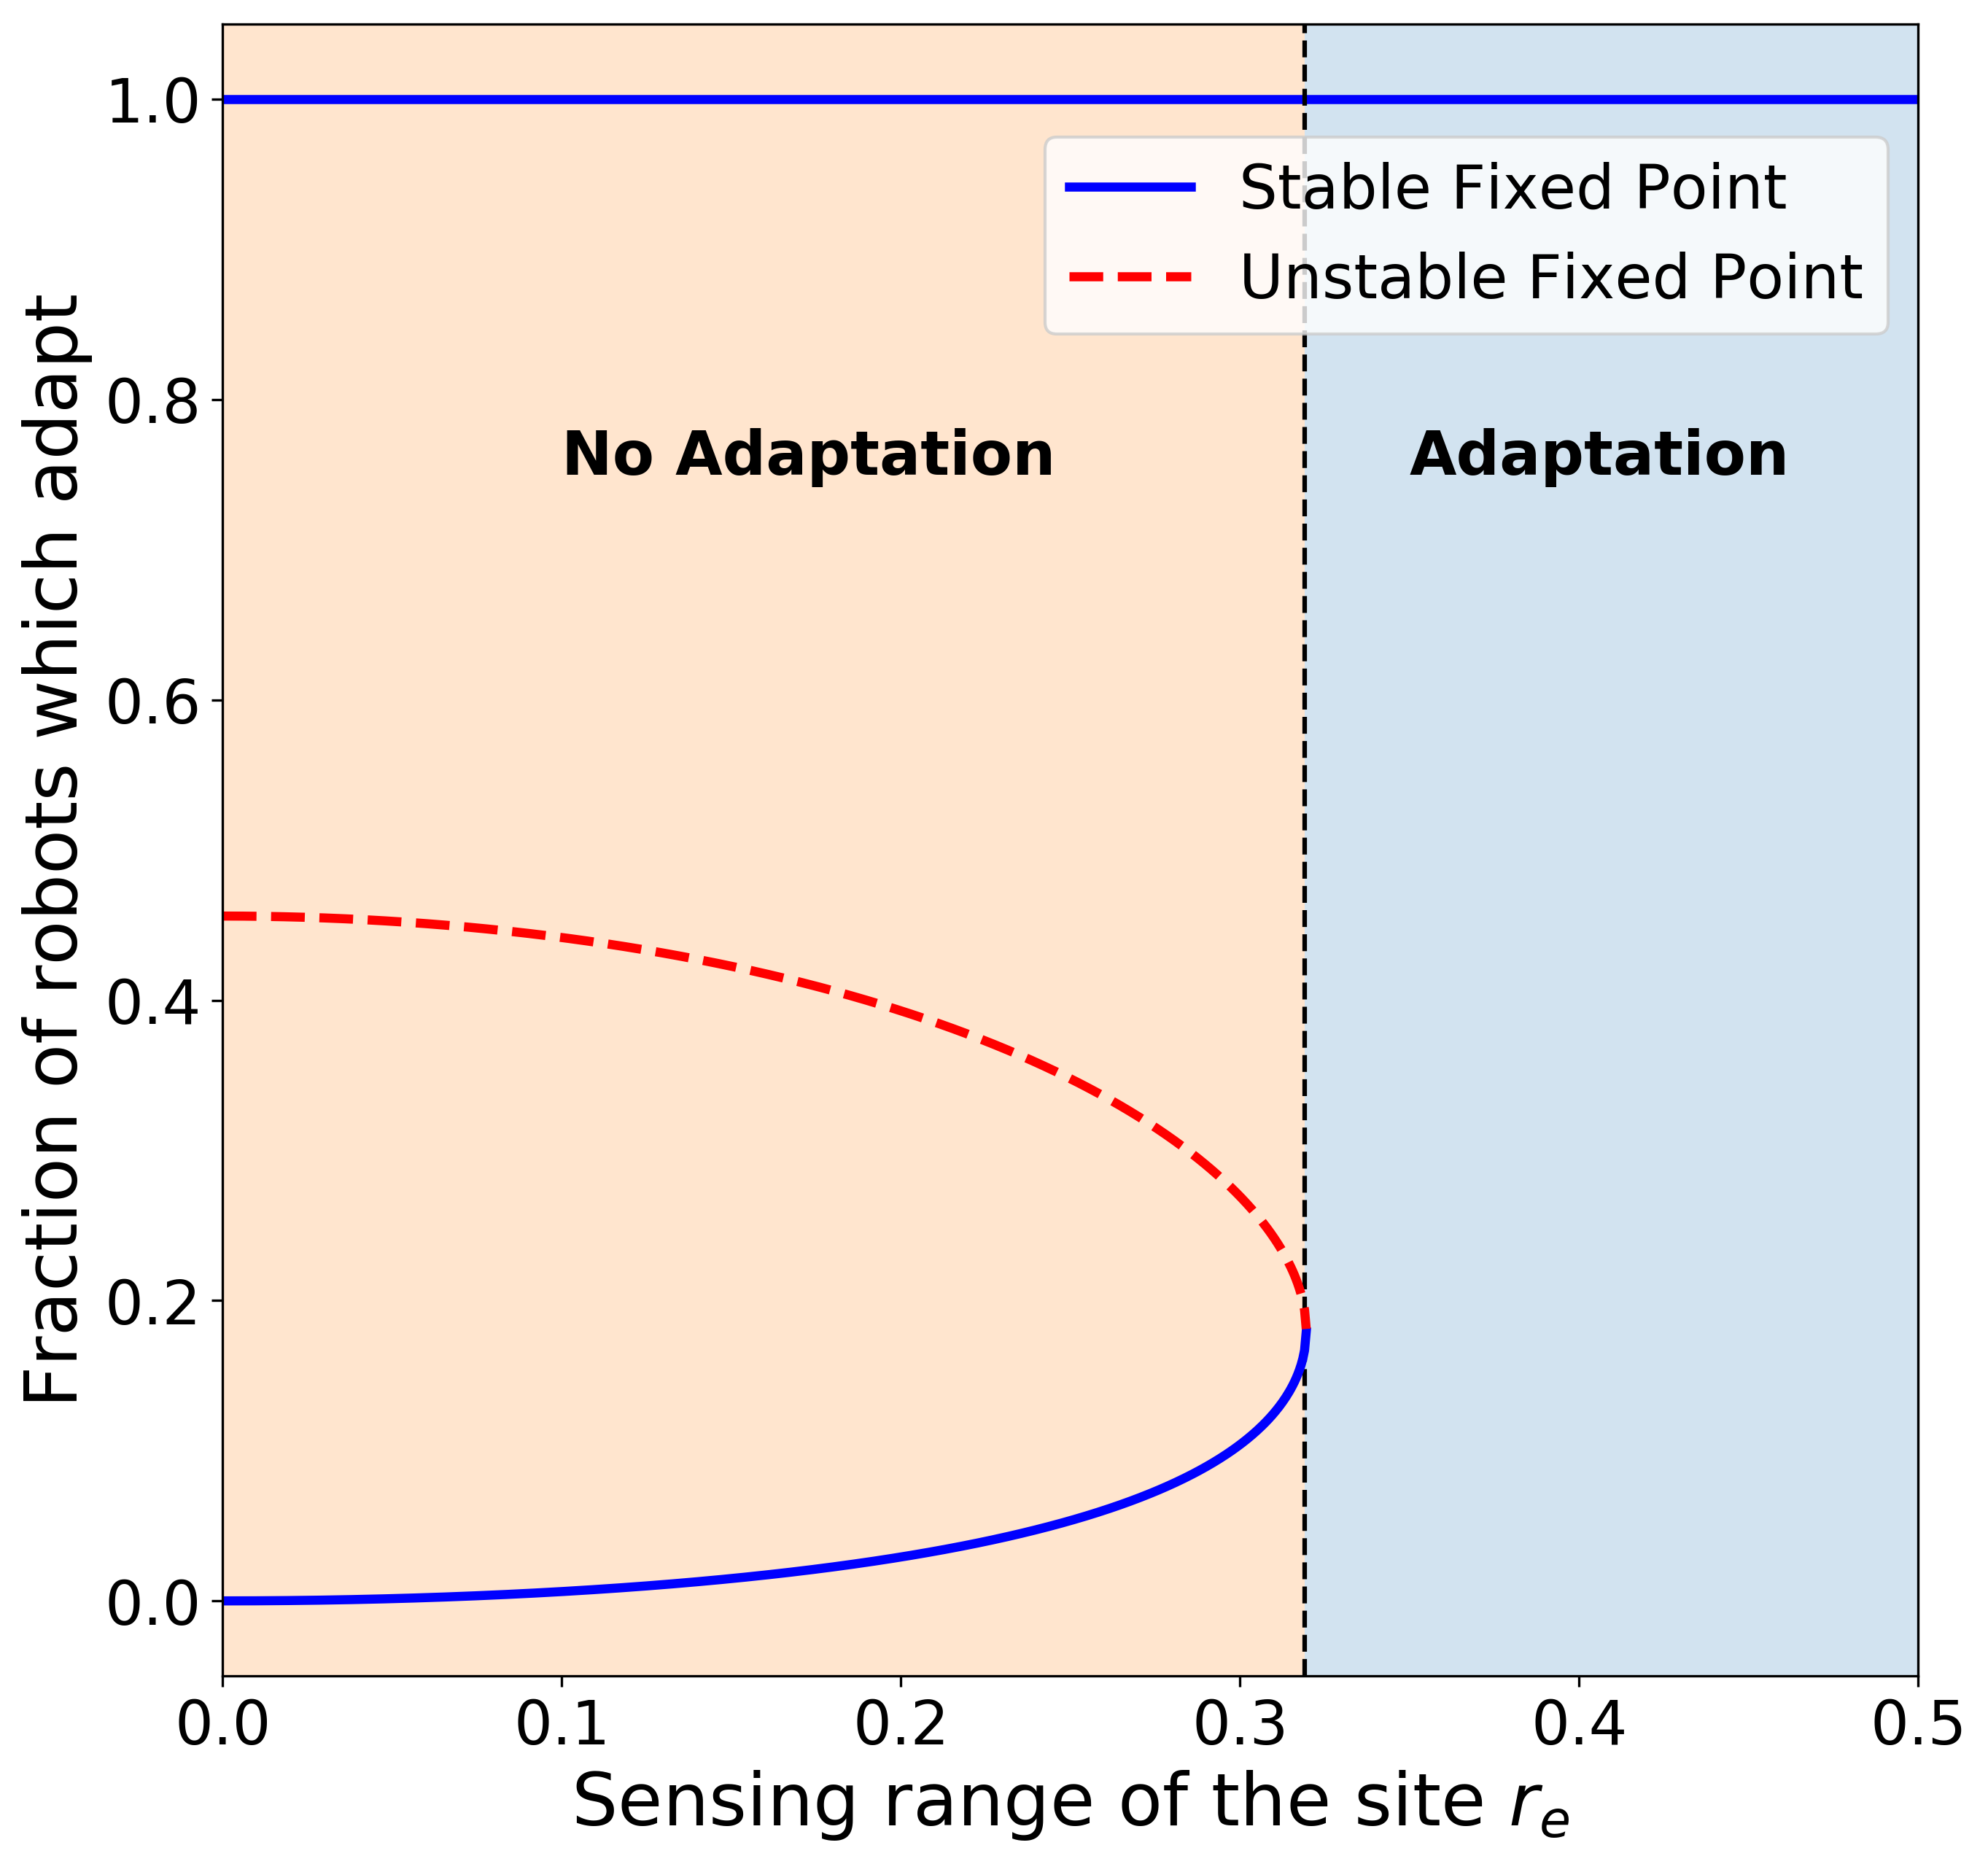

In [31]:
plt.figure(figsize=(10,10), dpi=300)

plt.hlines(1, 0, 0.5, color='b', lw=3)

plt.plot(fp[:count,0], fp[:count,1], 'b', label='Stable Fixed Point', lw=3)
plt.plot(fp[:count,0], fp[:count,2], '--r', label='Unstable Fixed Point', lw=3)

# bbpp = bp[2].subs([(Pe,0.1257), (Pm,PPm), (v,0.7), (δ,0.1), (N,200)])

bbpp = 0.319

plt.vlines(bbpp, -0.05, 1.05, linestyles='dashed')

xp = np.linspace(float(bbpp),200,101)
yp = np.ones(101)+0.05
zp = np.zeros(101)-0.05

plt.fill_between(xp, yp, zp, alpha=0.2)

xp = np.linspace(0,float(bbpp),101)
yp = np.ones(101)+0.05
zp = np.zeros(101)-0.05

plt.fill_between(xp, yp, zp, alpha=0.2)

plt.text(0.1, 0.75, 'No Adaptation', fontsize=20, weight='bold')
plt.text(0.35, 0.75, 'Adaptation', fontsize=20, weight='bold')

plt.xlim((0,0.5))
plt.ylim((-0.05,1.05))

plt.legend(fontsize=20, loc=1, bbox_to_anchor=(1,0.95))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Sensing range of the site $r_e$', fontsize=24)
plt.ylabel('Fraction of robots which adapt', fontsize=24)

plt.savefig('Plot_re.pdf')

plt.show()